In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 샘플데이터를 생성합니다.
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

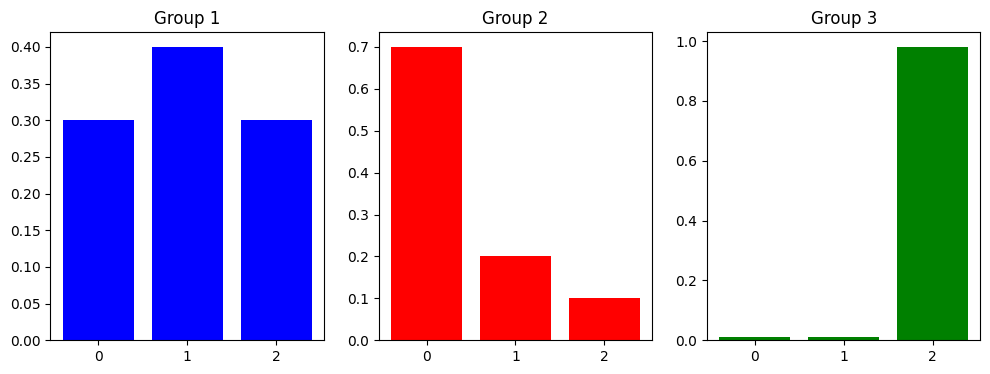

In [9]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

# Group2,3은 영향력이 높은 것이 보임(=앤트로피가 낮음)
# 반면에 Group1은 앤트로피가 높음.

In [10]:
# entropy를 구현합니다.
def entropy(x):
    return (-x*np.log2(x)).sum()

In [11]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

# 결과를 보면 Group1의 앤트로피 값이 가장 높음.

Group 1: 1.571
Group 2: 1.157
Group 3: 0.161


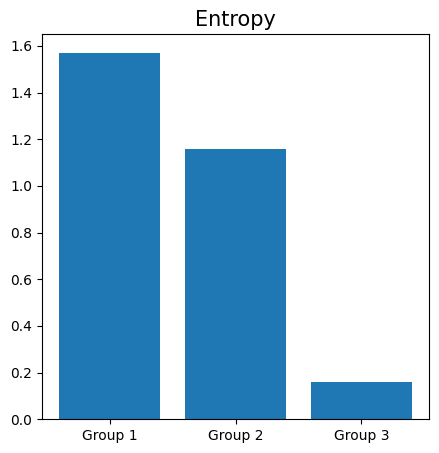

In [12]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

In [13]:
# Gini Index 구현합니다.
def gini(x):
    return 1 - ((x / x.sum())**2).sum()

In [14]:
# 샘플데이터를 생성합니다.
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

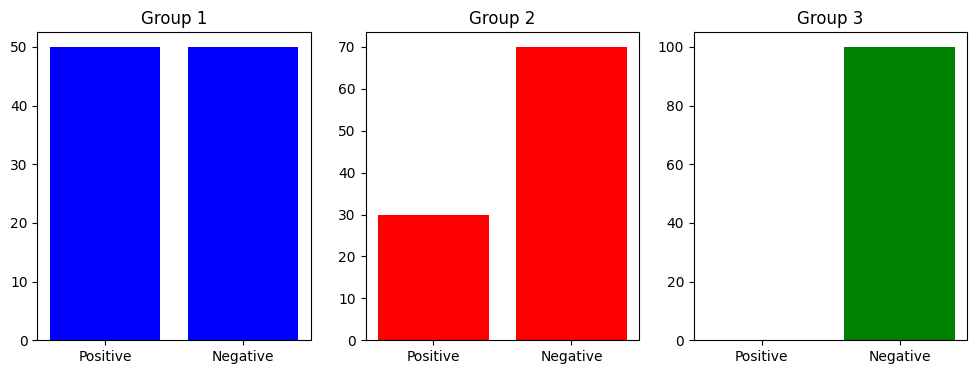

In [15]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [16]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

# Group1의 지니계수가 가장 높음.

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


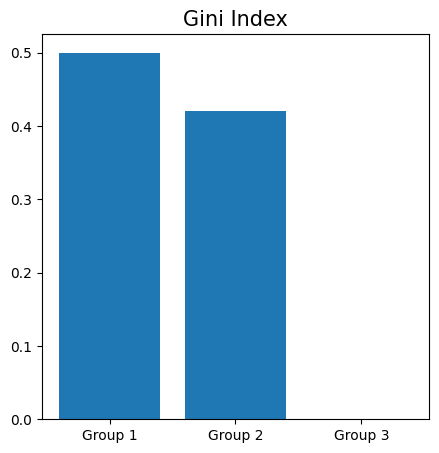

In [17]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [gini_1, gini_2, gini_3])
plt.title('Gini Index', fontsize=15)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 42

In [19]:
# breast cancer 데이터셋 로드
cancer = load_breast_cancer()

In [20]:
print(len(cancer['data'])) # X
print(len(cancer['target'])) # Y (label)


569
569


In [21]:
# train, test 데이터 분할
# stratify : training/test class 비율 유지
# class balance의 1과0의 비율이 거의 비슷
# class inbalance 1과0의 비율이 비슷하지 않음 (힌쪽에 몰려있는 경우)
# test_size : 0.25
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=SEED)

In [22]:
len(x_train)

426

In [28]:
len(x_test)

143

In [31]:
len(x_test)/(len(x_train)+len(x_test))

0.2513181019332162

In [23]:
# 알고리즘 정의
tree = DecisionTreeClassifier(random_state=0)

In [24]:
# 학습
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
# 예측
pred = tree.predict(x_test)

In [32]:
# 정확도 측정
accuracy = accuracy_score(pred, y_test)
print(f'Accuracy Score: {accuracy:.3f}')

Accuracy Score: 0.937


In [34]:
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

def show_trees(tree):
    export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                    feature_names=cancer['feature_names'], 
                    precision=3, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
    pred = tree.predict(x_test)
    print('정확도: {:.2f} %'.format(accuracy_score(y_test, pred) * 100))

    display(graphviz.Source(dot_graph))

정확도: 93.71 %


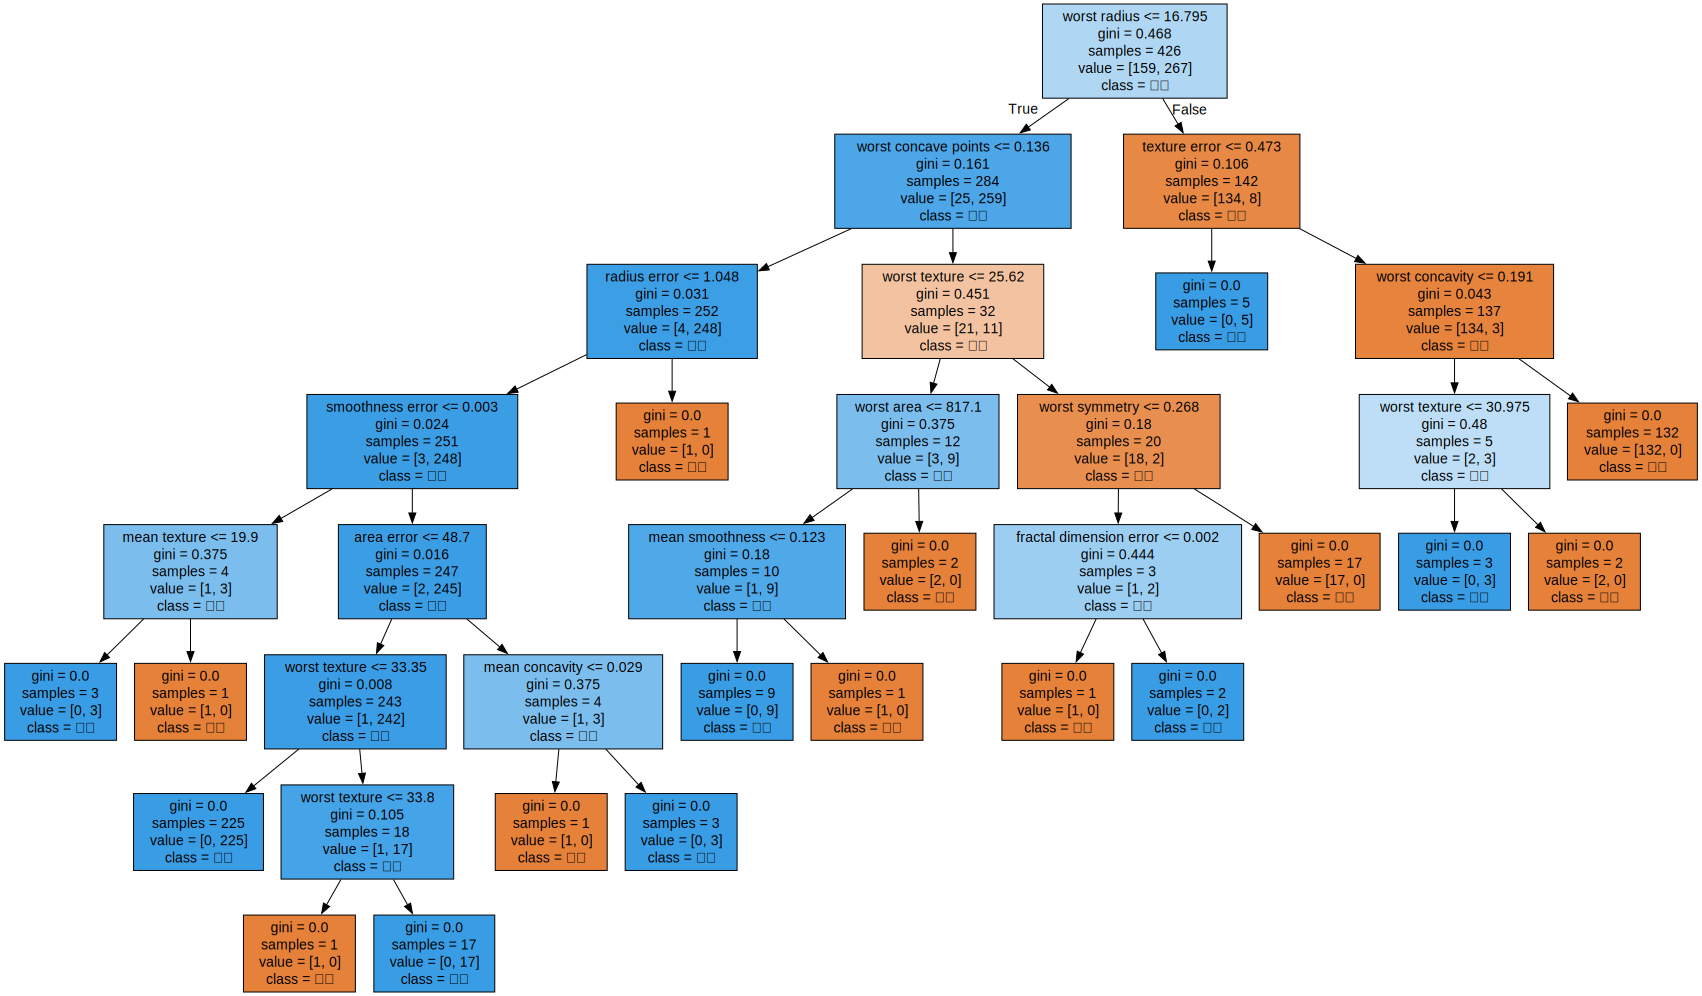

In [35]:
show_trees(tree)

정확도: 94.41 %


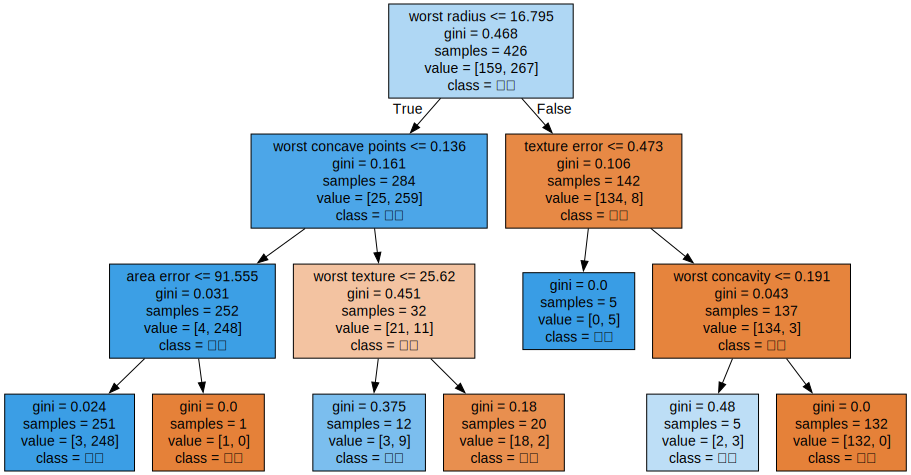

In [36]:
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

정확도: 94.41 %


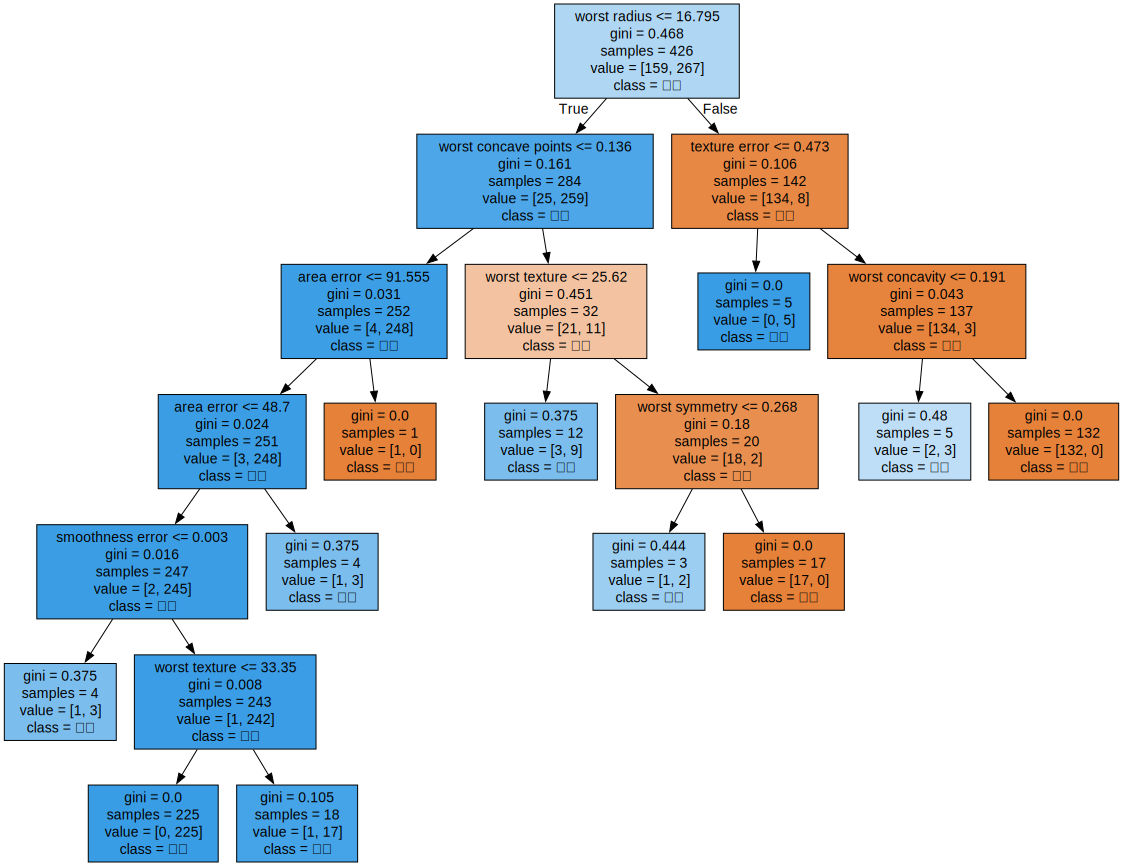

In [37]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20,  random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

In [38]:
DecisionTreeClassifier()

DecisionTreeClassifier()

정확도: 94.41 %


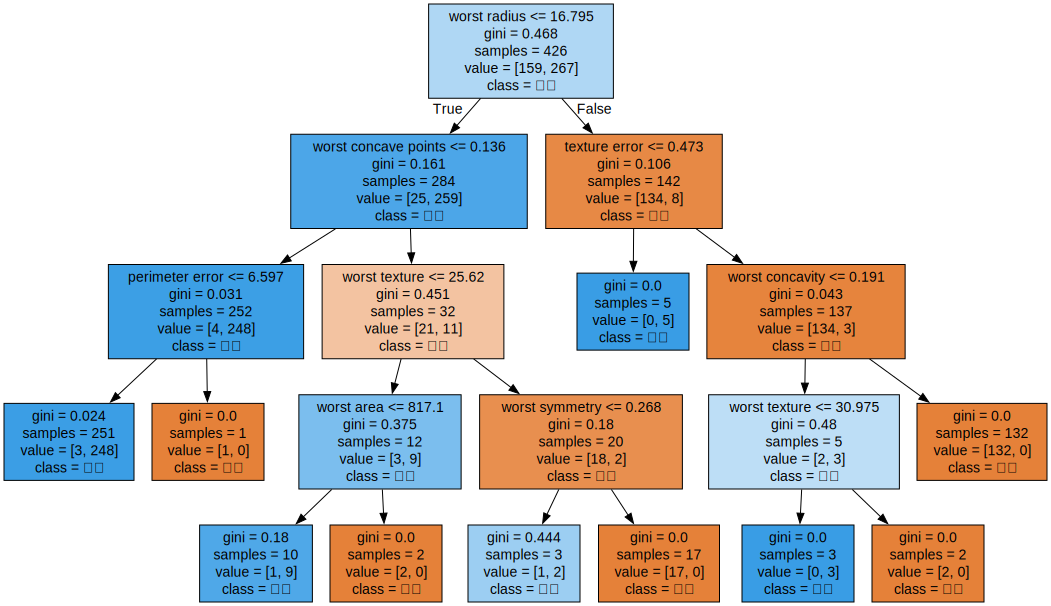

In [39]:
tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)